# Regression：linear model
这里采用最简单的linear model：**y_data=b+w*x_data**

我们要用gradient descent把b和w找出来

当然这个问题有closed-form solution，这个b和w有更简单的方法可以找出来；那我们假装不知道这件事，我们练习用gradient descent把b和w找出来

#### 数据准备：

In [1]:
# 假设x_data和y_data都有10笔，分别代表宝可梦进化前后的cp值
x_data=[338.,333.,328.,207.,226.,25.,179.,60.,208.,606.]
y_data=[640.,633.,619.,393.,428.,27.,193.,66.,226.,1591.]
# 这里采用最简单的linear model：y_data=b+w*x_data
# 我们要用gradient descent把b和w找出来

#### 计算梯度微分的函数getGrad()

In [2]:
# 计算梯度微分的函数getGrad()
def getGrad(b,w):
    # initial b_grad and w_grad
    b_grad=0.0
    w_grad=0.0
    for i in range(10):
        b_grad+=(-2.0)*(y_data[i]-(b+w*x_data[i]))
        w_grad+=(-2.0*x_data[i])*(y_data[i]-(b+w*x_data[i]))
    return (b_grad,w_grad)

### 1、自己写的版本
当两个微分值b_grad和w_grad都为0时，gradient descent停止，b和w的值就是我们要找的最终参数

In [31]:
# 这是我自己写的版本，事实证明结果很糟糕。。。
# y_data=b+w*x_data
# 首先，这里没有用到高次项，仅是一个简单的linear model，因此不需要regularization版本的loss function
# 我们只需要随机初始化一个b和w，然后用b_grad和w_grad记录下每一次iteration的微分值；不断循环更新b和w直至两个微分值b_grad和w_grad都为0，此时gradient descent停止，b和w的值就是我们要找的最终参数

b=-120 # initial b
w=-4 # initial w
lr=0.00001 # learning rate
b_grad=0.0
w_grad=0.0
(b_grad,w_grad)=getGrad(b,w)

while(abs(b_grad)>0.00001 or abs(w_grad)>0.00001):
    #print("b: "+str(b)+"\t\t\t w: "+str(w)+"\n"+"b_grad: "+str(b_grad)+"\t\t\t w_grad: "+str(w_grad)+"\n")
    b-=lr*b_grad
    w-=lr*w_grad
    (b_grad,w_grad)=getGrad(b,w)

print("the function will be y_data="+str(b)+"+"+str(w)+"*x_data")

error=0.0
for i in range(10):
    error+=abs(y_data[i]-(b+w*x_data[i]))
average_error=error/10
print("the average error is "+str(average_error))

the function will be y_data=-inf+nan*x_data
the average error is nan


上面的数据输出处于隐藏状态，点击即可显示

### 2、这里使用李宏毅老师的demo尝试

#### 引入需要的库

In [16]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')
%matplotlib inline 
import random as random
import numpy as np
import csv

#### 准备好b、w、loss的图像数据

In [17]:
# 生成一组b和w的数据图，方便给gradient descent的过程做标记
x = np.arange(-200,-100,1) # bias
y = np.arange(-5,5,0.1) # weight
Z = np.zeros((len(x),len(y))) # color
X,Y = np.meshgrid(x,y)
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        
        # Z[j][i]存储的是loss
        Z[j][i] = 0
        for n in range(len(x_data)):
            Z[j][i] = Z[j][i] + (y_data[n] - (b + w * x_data[n]))**2
        Z[j][i] = Z[j][i]/len(x_data)

#### 规定迭代次数和learning rate，进行第一次尝试
距离最优解还有一段距离

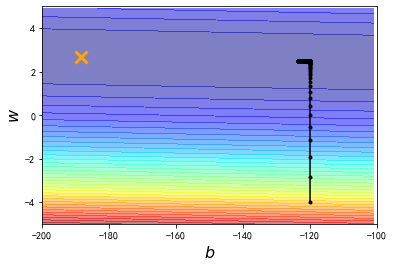

In [18]:
# y_data = b + w * x_data
b = -120 # initial b
w = -4 # initial w
lr = 0.0000001 # learning rate
iteration = 100000 # 这里直接规定了迭代次数，而不是一直运行到b_grad和w_grad都为0(事实证明这样做不太可行)

# store initial values for plotting，我们想要最终把数据描绘在图上，因此存储过程数据
b_history = [b]
w_history = [w]

# iterations
for i in range(iteration):
    
    # get new b_grad and w_grad
    b_grad,w_grad=getGrad(b,w)
    
    # update b and w
    b -= lr * b_grad
    w -= lr * w_grad
    
    #store parameters for plotting
    b_history.append(b)
    w_history.append(w)

# plot the figure
plt.contourf(x,y,Z,50,alpha=0.5,cmap=plt.get_cmap('jet'))
plt.plot([-188.4],[2.67],'x',ms=12,markeredgewidth=3,color='orange')
plt.plot(b_history,w_history,'o-',ms=3,lw=1.5,color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$',fontsize=16)
plt.ylabel(r'$w$',fontsize=16)
plt.show()

#### 把learning rate增大10倍尝试
发现经过100000次的update以后，我们的参数相比之前与最终目标更接近了，但是这里有一个剧烈的震荡现象发生

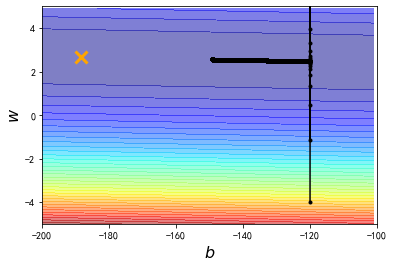

In [19]:
# 上图中，gradient descent最终停止的地方里最优解还差很远，
# 由于我们是规定了iteration次数的，因此原因应该是learning rate不够大，这里把它放大10倍

# y_data = b + w * x_data
b = -120 # initial b
w = -4 # initial w
lr = 0.000001 # learning rate 放大10倍
iteration = 100000 # 这里直接规定了迭代次数，而不是一直运行到b_grad和w_grad都为0(事实证明这样做不太可行)

# store initial values for plotting，我们想要最终把数据描绘在图上，因此存储过程数据
b_history = [b]
w_history = [w]

# iterations
for i in range(iteration):
    
    # get new b_grad and w_grad
    b_grad,w_grad=getGrad(b,w)
    
    # update b and w
    b -= lr * b_grad
    w -= lr * w_grad
    
    #store parameters for plotting
    b_history.append(b)
    w_history.append(w)

# plot the figure
plt.contourf(x,y,Z,50,alpha=0.5,cmap=plt.get_cmap('jet'))
plt.plot([-188.4],[2.67],'x',ms=12,markeredgewidth=3,color='orange')
plt.plot(b_history,w_history,'o-',ms=3,lw=1.5,color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$',fontsize=16)
plt.ylabel(r'$w$',fontsize=16)
plt.show()

#### 把learning rate再增大10倍
发现此时learning rate太大了，参数一update，就远远超出图中标注的范围了

所以我们会发现一个很严重的问题，如果learning rate变小一点，他距离最佳解还是会具有一段距离；但是如果learning rate放大，它就会直接超出范围了

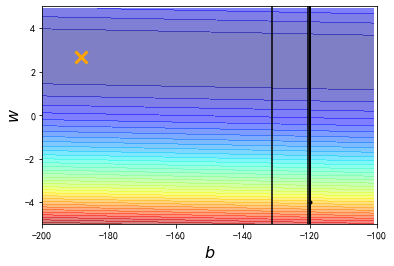

In [20]:
# 上图中，gradient descent最终停止的地方里最优解还是有一点远，
# 由于我们是规定了iteration次数的，因此原因应该是learning rate还是不够大，这里再把它放大10倍

# y_data = b + w * x_data
b = -120 # initial b
w = -4 # initial w
lr = 0.00001 # learning rate 放大10倍
iteration = 100000 # 这里直接规定了迭代次数，而不是一直运行到b_grad和w_grad都为0(事实证明这样做不太可行)

# store initial values for plotting，我们想要最终把数据描绘在图上，因此存储过程数据
b_history = [b]
w_history = [w]

# iterations
for i in range(iteration):
    
    # get new b_grad and w_grad
    b_grad,w_grad=getGrad(b,w)
    
    # update b and w
    b -= lr * b_grad
    w -= lr * w_grad
    
    #store parameters for plotting
    b_history.append(b)
    w_history.append(w)

# plot the figure
plt.contourf(x,y,Z,50,alpha=0.5,cmap=plt.get_cmap('jet'))
plt.plot([-188.4],[2.67],'x',ms=12,markeredgewidth=3,color='orange')
plt.plot(b_history,w_history,'o-',ms=3,lw=1.5,color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$',fontsize=16)
plt.ylabel(r'$w$',fontsize=16)
plt.show()

#### 这个问题明明很简单，可是只有两个参数b和w，gradient descent搞半天都搞不定，那以后做neural network有数百万个参数的时候，要怎么办呢
这个就是**一室不治何以国家为**的概念

#### 于是这里就要放大招了！！！——Adagrad
我们给b和w客制化的learning rate，让它们两个的learning rate不一样

the function will be y_data=-188.3668387495323+2.6692640713379903*x_data
error 0 is: 73.84441736270833 
error 1 is: 67.4980970060185 
error 2 is: 68.15177664932844 
error 3 is: 28.8291759825683 
error 4 is: 13.113158627146447 
error 5 is: 148.63523696608252 
error 6 is: 96.43143001996799 
error 7 is: 94.21099446925288 
error 8 is: 140.84008808876973 
error 9 is: 161.7928115187101 
the average error is 89.33471866905532


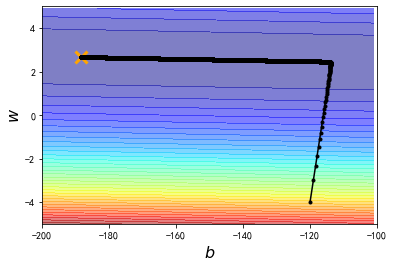

In [30]:
# 这里给b和w不同的learning rate 

# y_data = b + w * x_data
b = -120 # initial b
w = -4 # initial w
lr = 1 # learning rate 放大10倍
iteration = 100000 # 这里直接规定了迭代次数，而不是一直运行到b_grad和w_grad都为0(事实证明这样做不太可行)

# store initial values for plotting，我们想要最终把数据描绘在图上，因此存储过程数据
b_history = [b]
w_history = [w]

lr_b = 0
lr_w = 0

# iterations
for i in range(iteration):
    
    # get new b_grad and w_grad
    b_grad,w_grad=getGrad(b,w)
    
    # get the different learning rate for b and w
    lr_b = lr_b + b_grad ** 2
    lr_w = lr_w + w_grad ** 2
    
    # 这一招叫做adagrad，之后会详加解释
    # update b and w with new learning rate
    b -= lr / np.sqrt(lr_b) * b_grad
    w -= lr / np.sqrt(lr_w) * w_grad
    
    #store parameters for plotting
    b_history.append(b)
    w_history.append(w)
    
    # output the b w b_grad w_grad
    # print("b: "+str(b)+"\t\t\t w: "+str(w)+"\n"+"b_grad: "+str(b_grad)+"\t\t w_grad: "+str(w_grad)+"\n")
    
# output the final function and its error
print("the function will be y_data="+str(b)+"+"+str(w)+"*x_data")
error=0.0
for i in range(10):
    print("error "+str(i)+" is: "+str(np.abs(y_data[i]-(b+w*x_data[i])))+" ")
    error+=np.abs(y_data[i]-(b+w*x_data[i]))
average_error=error/10
print("the average error is "+str(average_error))

# plot the figure
plt.contourf(x,y,Z,50,alpha=0.5,cmap=plt.get_cmap('jet'))
plt.plot([-188.4],[2.67],'x',ms=12,markeredgewidth=3,color='orange')
plt.plot(b_history,w_history,'o-',ms=3,lw=1.5,color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$',fontsize=16)
plt.ylabel(r'$w$',fontsize=16)
plt.show()

#### 有了新的learning rate以后，从初始值到终点，我们在100000次iteration之内就可以顺利地完成了